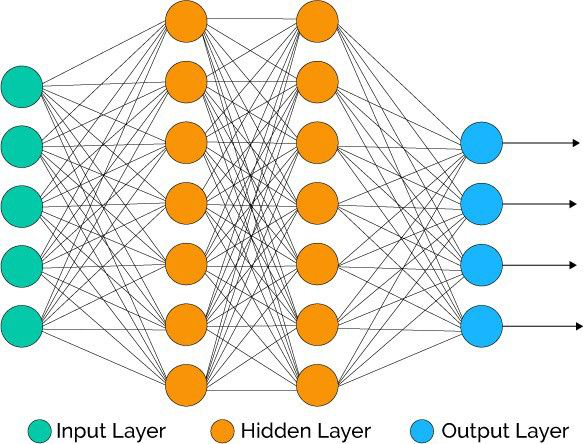

In [1]:
from PIL import Image
Image.open("nn.jpeg")

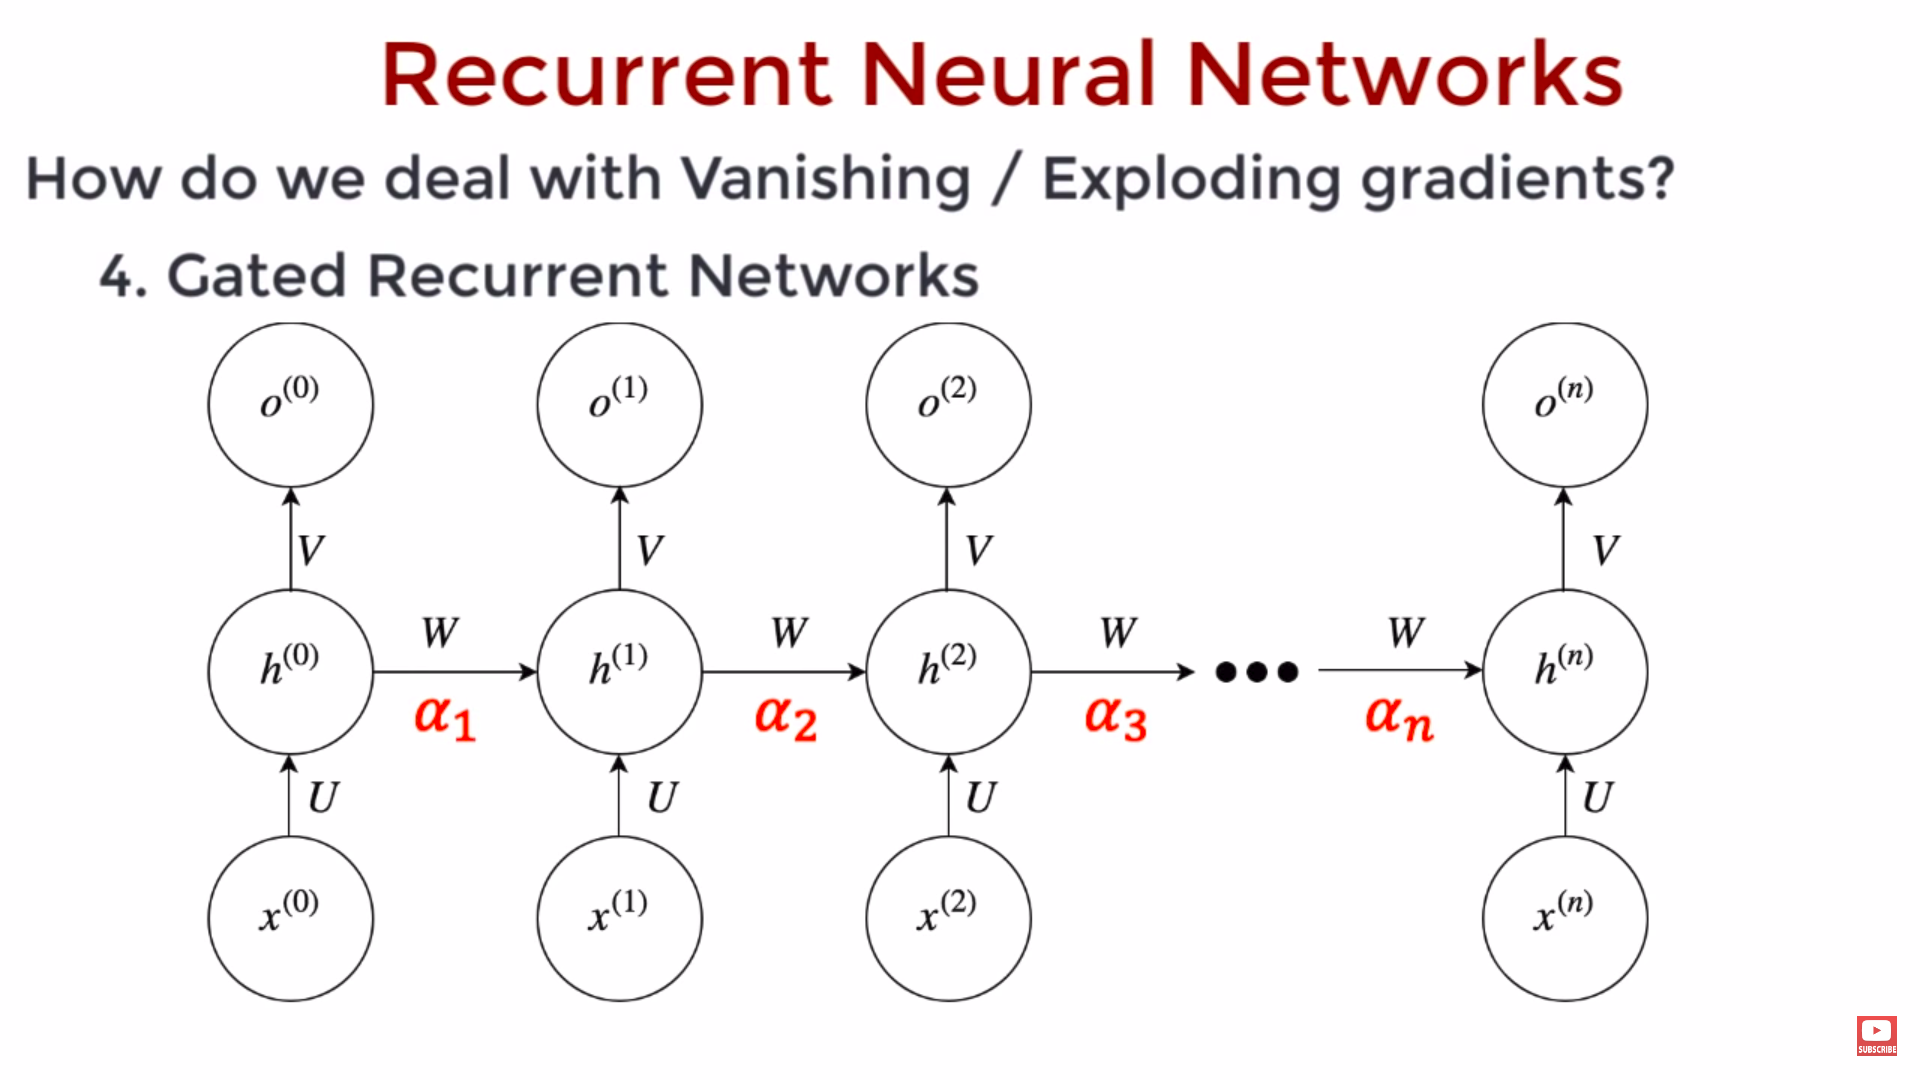

In [3]:
Image.open("rnn.png")

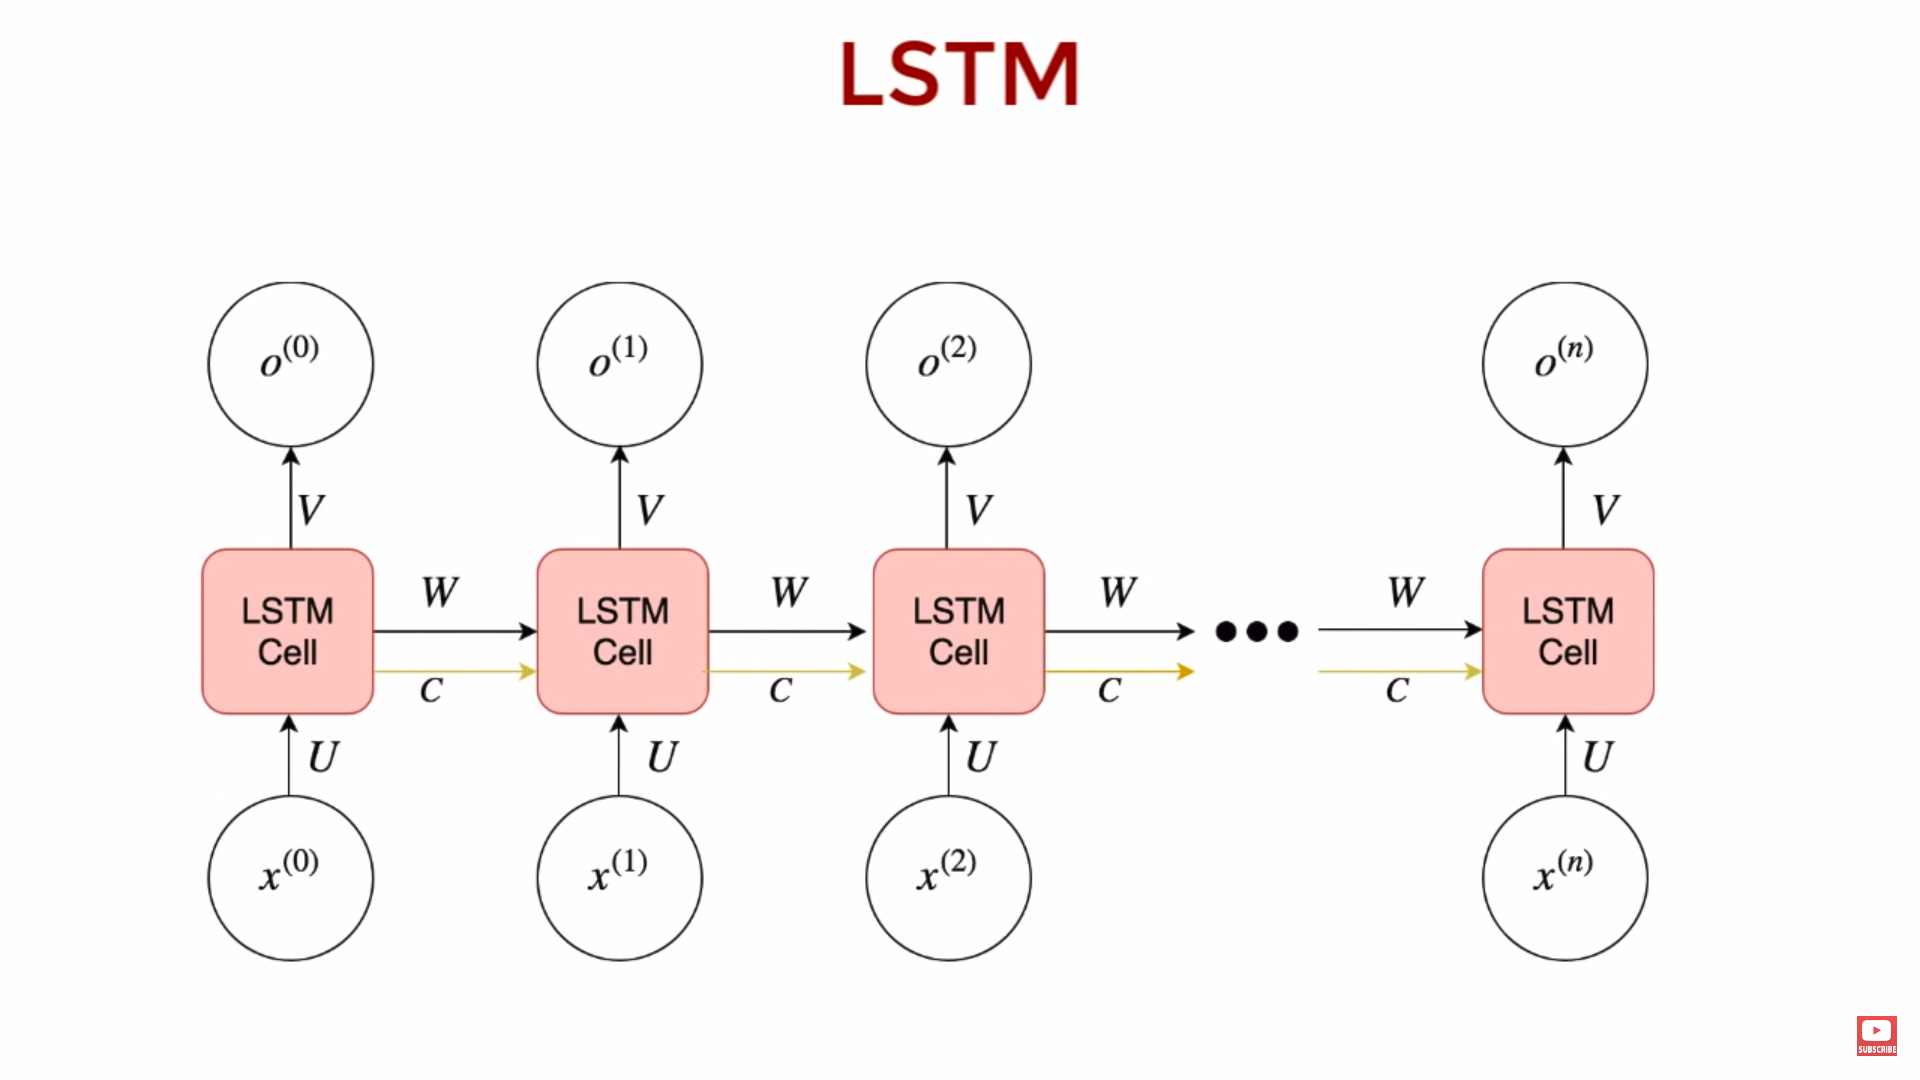

In [4]:
Image.open("lstm.png")

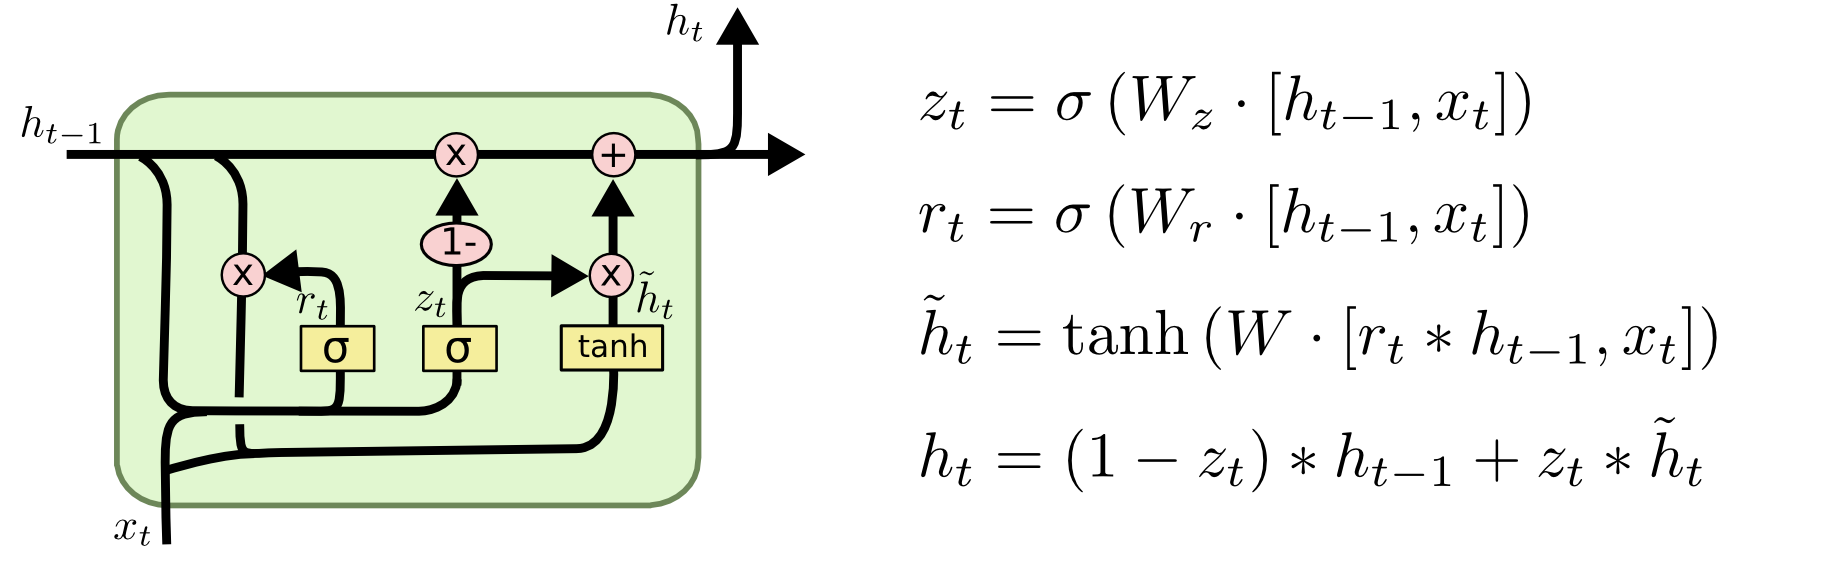

In [5]:
Image.open("LSTM.png")

In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_excel('train.xlsx')
training_set = dataset_train.iloc[:, 2:3].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 50 timesteps and 1 output
X_train = []
y_train = []
timestep = 50

for i in range(timestep, 201):
    X_train.append(training_set_scaled[i-timestep:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [2]:
X_train.shape[1]
# this is the timestep

50

In [14]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Reshape, Convolution2D, Activation, TimeDistributed, Lambda

# Initialising the RNN
regressor = Sequential()

regressor.add(Reshape(input_shape = (X_train.shape[1], 1), target_shape=(X_train.shape[1], 1, 1)))

for i in range(9):
    regressor.add(Convolution2D(64, kernel_size=(3,1), padding='same'))
    regressor.add(Activation('relu'))
    
regressor.add(Reshape(target_shape=(X_train.shape[1], 64*1)))
    
for i in range(3):
    regressor.add(LSTM(units=64, return_sequences=True, activation='tanh'))
    
regressor.add(Dropout(0.5))
regressor.add(TimeDistributed(Dense(units=1)))
regressor.add(Activation("softmax"))
regressor.add(Lambda(lambda x: x[:, -1, :], output_shape=[1]))
regressor.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    
# Adding the first LSTM layer and some Dropout regularisation
#regressor.add(LSTM(units = 512, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
#regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
#regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
#regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))

#regressor.add(Flatten())

# Adding the output layer
#regressor.add(Dense(units = 1))

# Compiling the RNN
#regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 300, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/300
151/151 [==============================] - 5s 33ms/step - loss: 0.4051 - acc: 0.0000e+00
Epoch 2/300
151/151 [==============================] - 0s 3ms/step - loss: 0.4051 - acc: 0.0000e+00
Epoch 3/300
151/151 [==============================] - 0s 3ms/step - loss: 0.4051 - acc: 0.0000e+00
Epoch 4/300
151/151 [==============================] - 0s 3ms/step - loss: 0.4051 - acc: 0.0000e+00
Epoch 5/300
151/151 [==============================] - 0s 3ms/step - loss: 0.4051 - acc: 0.0000e+00
Epoch 6/300
151/151 [==============================] - 0s 3ms/step - loss: 0.4051 - acc: 0.0000e+00
Epoch 7/300
151/151 [==============================] - 0s 3ms/step - loss: 0.4051 - acc: 0.0000e+00
Epoch 8/300
151/151 [==============================] - 0s 3ms/step - loss: 0.4051 - acc: 0.0000e+00
Epoch 9/300
151/151 [==============================] - 0s 3ms/step - loss

KeyboardInterrupt: 

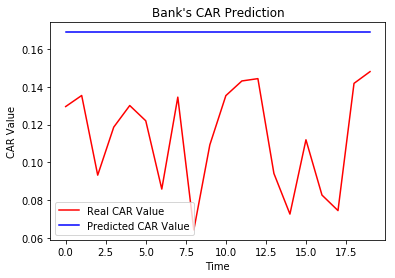

In [15]:
# Part 3 - Making the predictions and visualising the results

# Getting the real CAR values
dataset_test = pd.read_excel('test.xlsx')
real_car = dataset_test.iloc[:, 2:3].values


# Getting the predicted CAR values
dataset_total = pd.concat((dataset_train['Value'], dataset_test['Value']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timestep:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

for i in range(timestep, timestep+20): # 50 data values in test set
    X_test.append(inputs[i-timestep:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_car = regressor.predict(X_test)
predicted_car = sc.inverse_transform(predicted_car)

# Visualising the results
plt.plot(real_car, color = 'red', label = 'Real CAR Value')
plt.plot(predicted_car, color = 'blue', label = 'Predicted CAR Value')
plt.title("Bank's CAR Prediction")
plt.xlabel('Time')
plt.ylabel('CAR Value')
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(real_car, predicted_car))
rms

0.03144844681302345

In [ ]:
# timestep = 40 -> rms = 0.024339930553817876
# timestep = 60 -> rms = 0.02874293930901703